In [5]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 14]

In [6]:
with open ('../data/map_data.txt') as f:
    map_df = pd.read_table(f, sep='\t', header=None, names=['x_f','y_f','id'], lineterminator='\n')

with open ('../data/gt_data.txt') as f:
    gt_df = pd.read_table(f, sep=' ', header=None, names=['x','y','theta'], lineterminator='\n')

In [7]:
def transform_observation(p_x, p_y, p_theta, o_x, o_y):
    #(o_y, o_x) = (o_x, o_y)
    x = o_x * math.cos(p_theta) - o_y * math.sin(p_theta) + p_x
    y = o_x * math.sin(p_theta) + o_y * math.cos(p_theta) + p_y
    return (x,y)

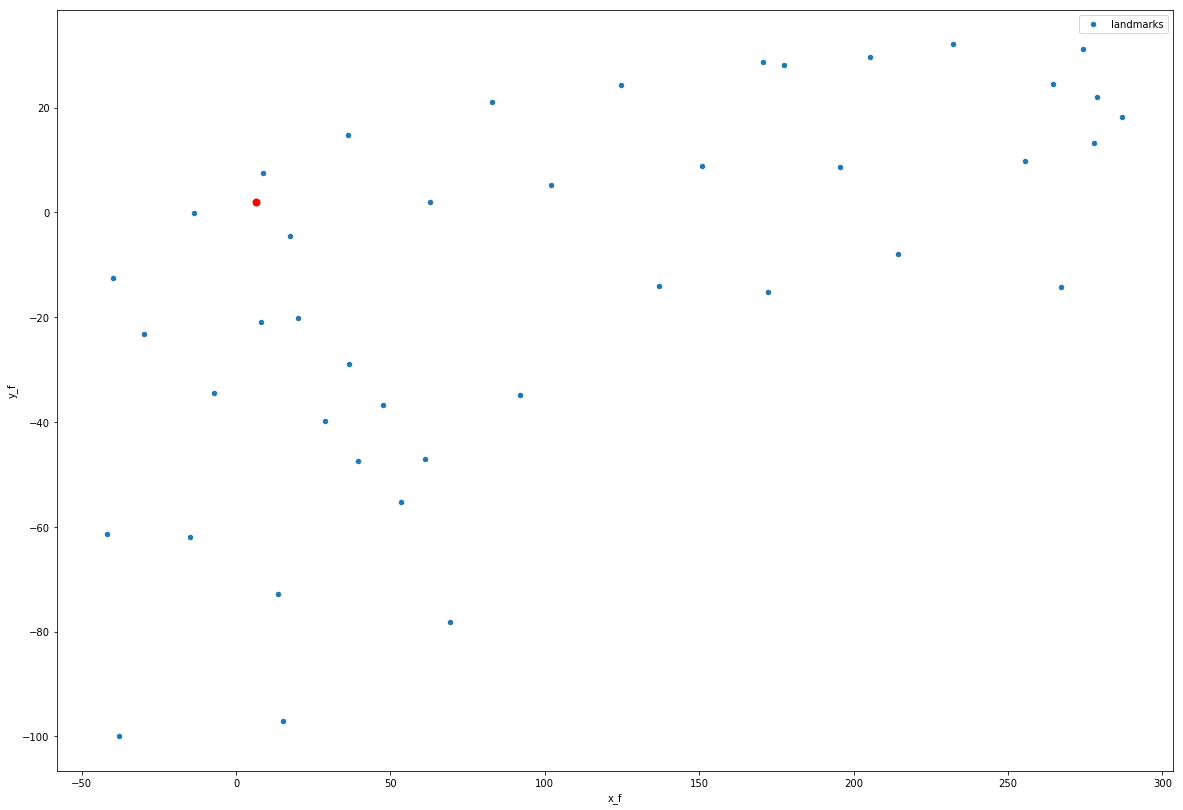

In [8]:
@interact
def show_decorated_map(step:(0,2444)=0):
    plt.figure()
    ax1=map_df.plot(kind='scatter', x='x_f', y='y_f', label='landmarks')
    
    gt_pos = gt_df.iloc[step]
    ax1.plot(gt_pos.x, gt_pos.y, 'ro',  markersize='7', label='ground truth')
    
    with open ('../output/particles_'+str(step)+'.txt') as f:
        p_df = pd.read_table(f, sep=' ', header=None, names=['x','y','theta'], lineterminator='\n')
    p_df.plot(kind='scatter', x='x', y='y', color='m', ax= ax1, label='particles')
    
    if step > 0:
        with open ('../data/observation/observations_%06d.txt' % step) as f:
            obs_df = pd.read_table(f, sep=' ', header=None, names=['x','y','theta'], lineterminator='\n')
            obs_df['tx'] = transform_observation(gt_pos.x, gt_pos.y, gt_pos.theta, obs_df['x'], obs_df['y'])[0]
            obs_df['ty'] = transform_observation(gt_pos.x, gt_pos.y, gt_pos.theta, obs_df['x'], obs_df['y'])[1]
            obs_df.plot(kind='scatter', x='tx', y='ty', marker="o", color='C2', ax= ax1, label='observations')

    plt.legend(loc='best')
    plt.show()